# Final Term Project Jypiter Notebook
## Amanda Yu
## Dr. Yasser Abduallah
## Binary Classification of Income Data Using Random Forest, SVM, and CNN
## Nov 16 2025

### 1. Using Random Forests, Conv1D, and SVM to predict income above and below 50k


#### 1.1 Goal
My project implements multiple machine learning classification algorithms, with a deep learning model, to predict whether a person earns more than $50K per year. The prediction is based on various demographic and work related features provided in the dataset. 

#### 1.2 What Binary Classification Is and Why It’s Important
Binary classification is a machine learning task where the goal is to sort data into two  categories, such like "yes or no" or "1 or 0". The model learns from labeled examples so it can predict what two groups a new sample belongs to.

This is important because many problems in the real world involve two outcomes, like detecting fraud, identifying diseases, filtering spam, or, in my project, predicting whether someone earns more or less than $50K. Binary classification provides a simple but powerful way to make reliable decisions in these situations.

#### 1.3 Dataset and Algorithms Used
This project uses the Adult Income Dataset found on Kaggle

This project implements machine learning algorithms, including:
- Random Forest
- Support Vector Machine (SVM)
- A 1D Convolutional Neural Network (CNN) for deep learning


### 2. Dataset

#### 2.1 Name & Source 
American Citizens Annual Income on Kaggle

link: https://www.kaggle.com/datasets/amirhosseinmirzaie/americancitizenincome/code

#### 2.2 Description: 
The original dataset has 25,000 rows and 15 features, covering demographic and work related attributes such as age, education, occupation, capital gain/loss, and working hours weekly. The target variable is income, if a person earns more than $50K or not.

Because of this project requirement, it was trimmed down to 224 entries while retaining the same 15 features and 26 KB



#### 2.3 Preprocessing steps:
reqired packages 

In [40]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, brier_score_loss


In [41]:
df = pd.read_csv(Path.home() / "income_trimmed.csv")
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,224.000000,2.240000e+02,224.000000,223.000000,223.000000,223.000000
mean,38.834821,1.880479e+05,10.044643,1375.053812,61.784753,40.147982
std,12.724555,1.209545e+05,2.581022,9587.245759,352.709855,12.062920
min,17.000000,1.487800e+04,1.000000,0.000000,0.000000,4.000000
25%,29.000000,1.171008e+05,9.000000,0.000000,0.000000,39.500000
50%,38.000000,1.752690e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.292240e+05,11.250000,0.000000,0.000000,45.000000
max,82.000000,1.125613e+06,16.000000,99999.000000,2754.000000,99.000000


In [5]:
# Col names are like "capital.gain" will create problems later so replace . with _
df.columns=df.columns.str.lower().str.replace('.','_')
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             224 non-null    int64  
 1   workclass       224 non-null    object 
 2   fnlwgt          224 non-null    int64  
 3   education       224 non-null    object 
 4   education_num   224 non-null    int64  
 5   marital_status  224 non-null    object 
 6   occupation      224 non-null    object 
 7   relationship    223 non-null    object 
 8   race            223 non-null    object 
 9   sex             223 non-null    object 
 10  capital_gain    223 non-null    float64
 11  capital_loss    223 non-null    float64
 12  hours_per_week  223 non-null    float64
 13  native_country  223 non-null    object 
 14  income          223 non-null    object 
dtypes: float64(3), int64(3), object(9)
memory usage: 26.4+ KB


In [7]:
df.head(10)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999.0,0.0,70.0,United-States,>50K
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0.0,0.0,60.0,United-States,>50K
4,54,?,148657,Preschool,1,Married-civ-spouse,?,Wife,White,Female,0.0,0.0,40.0,Mexico,<=50K
5,63,Private,111963,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,16.0,United-States,<=50K
6,25,Private,207875,7th-8th,4,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0.0,0.0,40.0,Mexico,<=50K
7,71,Local-gov,229110,HS-grad,9,Widowed,Exec-managerial,Other-relative,White,Female,0.0,0.0,33.0,United-States,<=50K
8,37,Private,66686,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
9,44,Private,227399,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K


In [8]:
# Looks like missing values were filled with ?
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']

print(df[cols].eq('?').any(axis=1).sum())

cols_with_q = (df == '?').any()
print(cols_with_q[cols_with_q].index.tolist())

15
['workclass', 'occupation', 'native_country']


In [9]:
# Remove Missing Values 

df2 = df.replace('?', np.nan)
df2 = df2.dropna()

df2.head(10)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999.0,0.0,70.0,United-States,>50K
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0.0,0.0,60.0,United-States,>50K
5,63,Private,111963,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,16.0,United-States,<=50K
6,25,Private,207875,7th-8th,4,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0.0,0.0,40.0,Mexico,<=50K
7,71,Local-gov,229110,HS-grad,9,Widowed,Exec-managerial,Other-relative,White,Female,0.0,0.0,33.0,United-States,<=50K
8,37,Private,66686,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
9,44,Private,227399,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
10,21,Private,57916,HS-grad,9,Never-married,Protective-serv,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K


In [10]:
print(df.shape[0])
print(df2.shape[0])


224
208


In [11]:
# Making a new column to make income binary 

df2['income_binary'] = np.where(df2['income'] == '>50K' , 1,0)

In [12]:
num_feats = ['age', 'fnlwgt', 'education_num', 'capital_gain', 
             'capital_loss', 'hours_per_week']

In [13]:
for col in num_feats:
    df2[col] = pd.to_numeric(df2[col], errors='coerce')


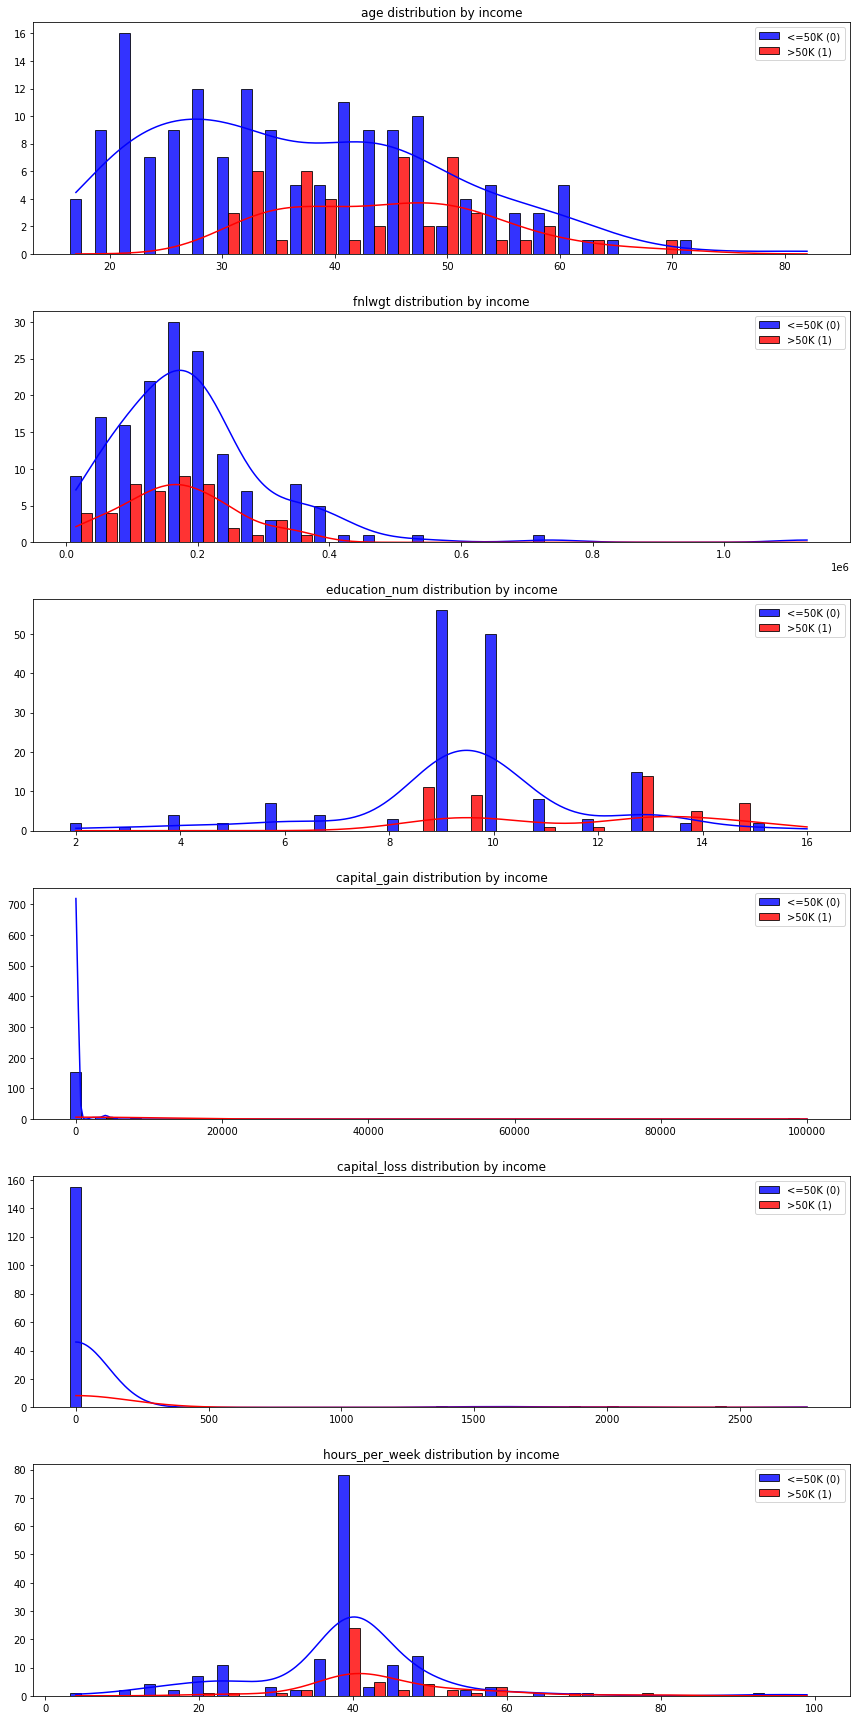

In [14]:
fig, ax = plt.subplots(len(num_feats), 1, figsize=(12, 4 * len(num_feats)))

for i, col in enumerate(num_feats):

    # Split into income groups
    x0 = df2[df2['income_binary']==0][col].dropna()
    x1 = df2[df2['income_binary']==1][col].dropna()

    # bins both groups share 
    bins = np.histogram(np.hstack([x0, x1]), bins=30)[1]

    # Width for dodging bars
    width = (bins[1] - bins[0]) * 0.45

    # plot histograms side-by-side
    ax[i].hist(x0, bins=bins - width/2, color='blue', alpha=0.8,
               label='<=50K (0)', edgecolor='black', width=width)
    ax[i].hist(x1, bins=bins + width/2, color='red', alpha=0.8,
               label='>50K (1)', edgecolor='black', width=width)

    # KDE curves 
    kde0 = gaussian_kde(x0)
    kde1 = gaussian_kde(x1)
    xs = np.linspace(min(bins), max(bins), 300)
    ax[i].plot(xs, kde0(xs) * len(x0) * (bins[1]-bins[0]), color='blue')
    ax[i].plot(xs, kde1(xs) * len(x1) * (bins[1]-bins[0]), color='red')
   

    ax[i].set_title(f"{col} distribution by income")
    ax[i].legend()

plt.tight_layout()
plt.show()

The distributions of 'Age' and 'education_num' has some symmetric in shape. 

In contrast, the distributions of the remaining attributes are skewed toward one side or only slightly skewed.

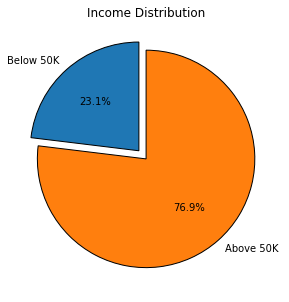

In [15]:
l = list(df2['income_binary'].value_counts())
circle = [l[1] / sum(l) * 100, l[0] / sum(l) * 100]

fig, ax = plt.subplots(figsize=(8,5))
ax.pie(circle,
       labels=['Below 50K', 'Above 50K'], 
       autopct='%1.1f%%',
       startangle=90,
       explode=(0.1, 0),
       wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})

ax.set_title('Income Distribution')
plt.show()

In [16]:
df2['income_binary'].value_counts()

# Shows moderate class imbalance 

income_binary
0    160
1     48
Name: count, dtype: int64

Checking for Correlation between attributes

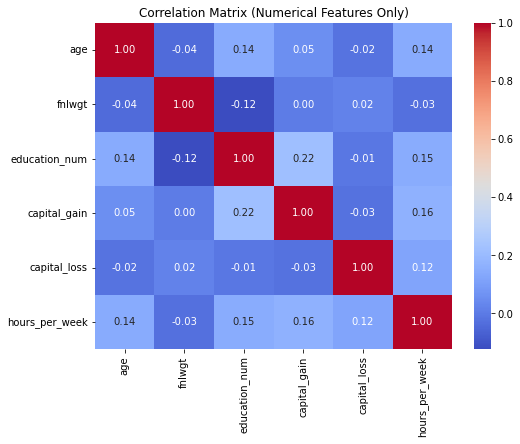

In [17]:
# coreelation  
corr_df = df2.drop('income_binary', axis=1)

plt.figure(figsize=(8,6))
sns.heatmap(df2[num_feats].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix (Numerical Features Only)")
plt.show()


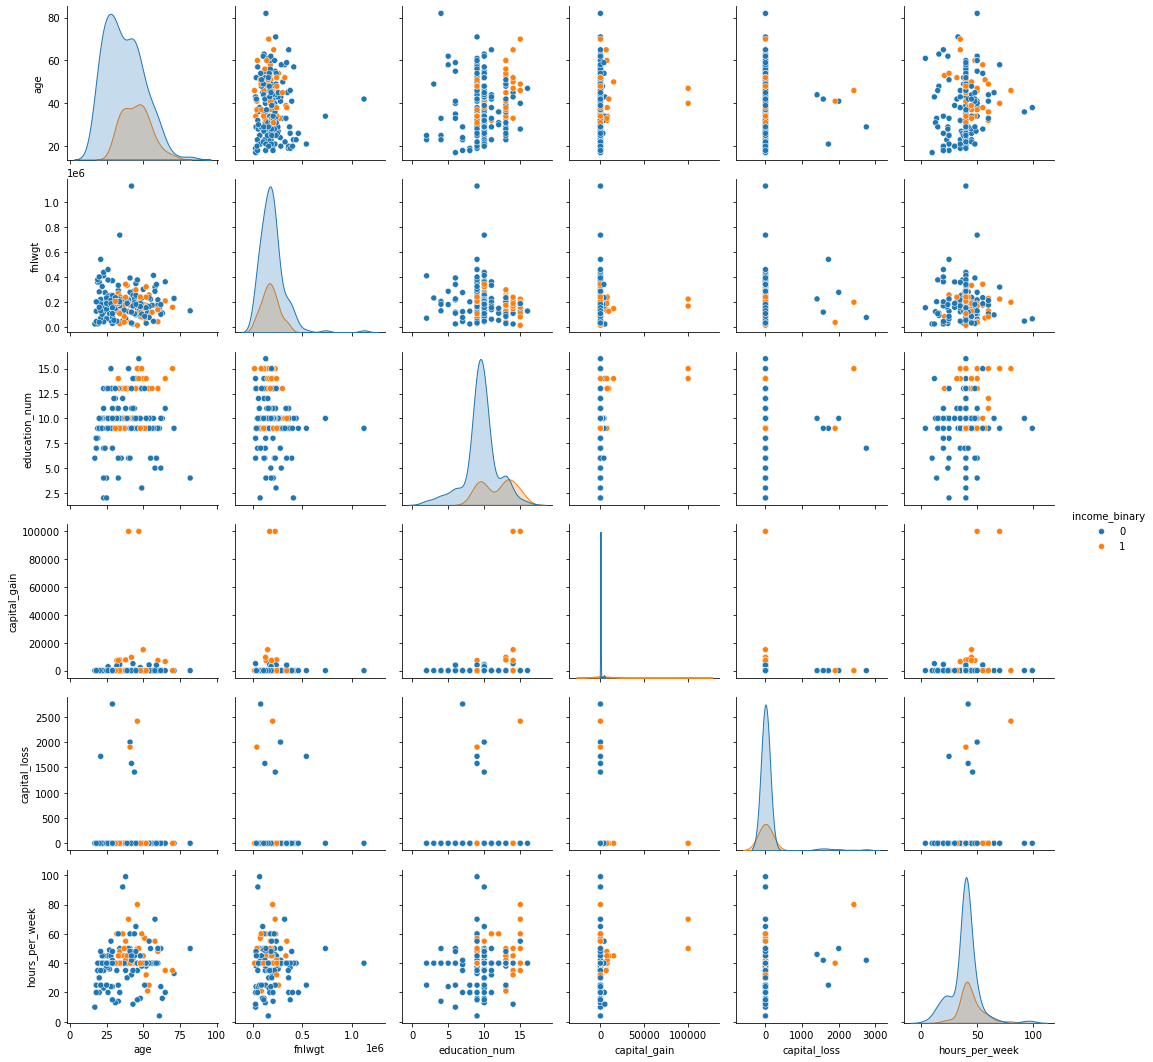

In [18]:
sns.pairplot(df2, hue='income_binary')
plt.show()

In [19]:
# modelling + One-hot encode 
df2['income_binary'] = (df2['income'] == '>50K').astype(int)

df2 = df2.drop(columns=['income'])

df3 = pd.get_dummies(df2, drop_first=True)


Separating The Dataset into Features and Output label

In [20]:
# Feature and label separation
X = df3.drop('income_binary', axis=1)   # all features
y = df3['income_binary']    # labels

Train Test Split and scaling

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train[num_feats] = scaler.fit_transform(X_train[num_feats])
X_test[num_feats]  = scaler.transform(X_test[num_feats])

In [22]:
df3.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'income_binary', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov', 'education_11th',
       'education_12th', 'education_1st-4th', 'education_5th-6th',
       'education_7th-8th', 'education_9th', 'education_Assoc-acdm',
       'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate',
       'education_HS-grad', 'education_Masters', 'education_Prof-school',
       'education_Some-college', 'marital_status_Married-civ-spouse',
       'marital_status_Married-spouse-absent', 'marital_status_Never-married',
       'marital_status_Separated', 'marital_status_Widowed',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Prof-specialty'

Implementing binary classification algorithms

Define the necessary function for model fitting and metric calculation
manual metrics 

In [23]:
def calc_metrics(y_true, y_pred):
    # confusion matrix 
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    P = tp + fn
    N = tn + fp

    # accuracy, precision, recall, etc 
    acc = (tp + tn) / (P + N) 
    prec = tp / (tp + fp) 
    rec = tp / (tp + fn) 
    f1 = 2*prec*rec/(prec+rec)
    err = 1 - acc

    # rates
    tpr = rec
    tnr = tn / (tn + fp) 
    fpr = fp / (fp + tn) 
    fnr = fn / (tp + fn) 
    bal_acc = (tpr + tnr) / 2

    # skill scores
    tss = tpr - fpr
    hss = (2*(tp*tn - fp*fn)) / (P*(fn+tn) + N*(tp+fp)) 

    results = {
        "TP": tp, "TN": tn, "FP": fp, "FN": fn,
        "TPR": tpr, "TNR": tnr,
        "FPR": fpr, "FNR": fnr,
        "Precision": prec,
        "Accuracy": acc,
        "Recall": rec,
        "F1_measure": f1,
        "Error_rate": err,
        "BAcc": bal_acc,
        "TSS": tss,
        "HSS": hss
    }

    # one per line
    for k, v in results.items():
        print(f"{k}: {v}")
    print()

    return results

In [24]:
def conf_matrix(cm, title):
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Pred 0', 'Pred 1'],
                yticklabels=['True 0', 'True 1'])
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

#### 3. Algorithms Overview
**Random Forest** 
- An ensemble learning technique that creates and combines the predictions of decision trees. Each tree is constructed by randomly sampling from both the data and the possible data features which typically helps reduce overfitting and improve generalisation. It is effective for tabular data, can utilize either numerical or categorical data, and can find complex, non-linear structures. Random Forest was chosen to provide a reliable and straightforward option and often provides very good performance on structured data, such as the dataset considered here.

In [25]:
# Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)
rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

**Support Vector Machines (SVMs)** 
- This algorithm is a strong baseline classifier, especially for binary classification tasks. SVMs works by finding the best boundary or hyperplane between the two classes. Some strengths of SVM include better performance on smaller datasets, robustness to high dimensional data, and the ability to model complex boundaries using different kernels. However, they also can be slow with larger datasets, require careful parameter tuning, and are less interpretable than simple decision trees. Regardless, they still offer a solid comparison benchmark against both Random Forest and the CNN.

In [26]:
# SVM
svm_clf = SVC(
    kernel='linear', 
    class_weight='balanced', 
    probability=True, 
    random_state=42
)

svm_clf.fit(X_train, y_train)

# predictions f
y_pred_svm = svm_clf.predict(X_test)

# probabilities for ROC/AUC/Brier stuff
y_proba_svm = svm_clf.predict_proba(X_test)[:, 1]

**CNNs**  
- CNNs are usually used with images, a 1D version can learn local patterns and interactions between neighbouring features in tabular data. This gives it the ability to capture relationships that simpler models might miss. It also scales well when more data or features are added. A CNN is useful here because it can automatically learn feature representations and may uncover subtle income-related patterns that aren’t obvious to traditional ML models.

In [27]:
#CONV1D
# 1D CNN tabular data 
# simple 1D CNN binary 
class CNN_mod(nn.Module):
    def __init__(self, num_features):
        
        super(CNN_mod, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=3, padding="same")
      
        # ReLU activation function to introduce non-linearity
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()

        # fully connected layers (Dense layers)
        self.fc1 = nn.Linear(32 * num_features, 32)
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
    
        x = self.conv1(x)
        # Apply the ReLU activation function
        x = self.relu(x)   
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        # Final output layer  for binary classification
        x = self.fc2(x)
        
        return x

    
# ensure y_train is 0/1 
X_train = X_train.astype(np.float32)
X_test  = X_test.astype(np.float32)

X_train_cnn = torch.tensor(X_train.values, dtype=torch.float32).unsqueeze(1)  # (batch, 1, num_features)
y_train_t   = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)  # (batch, 1)

X_test_cnn  = torch.tensor(X_test.values, dtype=torch.float32).unsqueeze(1)
y_test_t    = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

train_ds = TensorDataset(X_train_cnn, y_train_t)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)

# count positives (1) and negatives (0) in training labels
pos = y_train_t.sum()
neg = len(y_train_t) - pos

# pos_weight > 1 will up-weight the positive class (usually minority, >50K)
pos_weight = neg / pos   # rough ratio

print("pos:", pos.item(), "neg:", neg.item(), "pos_weight:", pos_weight.item())

criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)


pos: 38.0 neg: 128.0 pos_weight: 3.3684210777282715


In [28]:
# Create model + optimizer

num_features = X_train.shape[1]

model = CNN_mod(num_features=num_features)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

epochs = 10  

for epoch in range(1, epochs+1):
    model.train()
    batch_losses = []
    
    for xb, yb in train_loader:
        optimizer.zero_grad()
        logits = model(xb) # (batch, 1)
        loss = criterion(logits, yb) # BCEWithLogitsLoss handles sigmoid inside
        loss.backward()
        optimizer.step()
        batch_losses.append(loss.item())
    
    print(f"Epoch {epoch} Train Loss: {np.mean(batch_losses):.4f}")


Epoch 1 Train Loss: 1.0467
Epoch 2 Train Loss: 0.9705
Epoch 3 Train Loss: 0.9199
Epoch 4 Train Loss: 0.8626
Epoch 5 Train Loss: 0.8271
Epoch 6 Train Loss: 0.7897
Epoch 7 Train Loss: 0.7519
Epoch 8 Train Loss: 0.6924
Epoch 9 Train Loss: 0.6677
Epoch 10 Train Loss: 0.6222


In [29]:
# turn X_test into tensors for CNN
model.eval()
with torch.no_grad():
    logits = model(X_test_cnn).squeeze(1) 
    probs = torch.sigmoid(logits).numpy() # convert logits to probabilities
    y_pred_cnn = (probs >= 0.5).astype(int)

# cnn_metrics = calc_metrics(y_test, y_pred_cnn)
# print("CNN metrics:", cnn_metrics)



#### 4. Implementation

In [30]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

all_rf_metrics = []
all_svm_metrics = []
all_cnn_metrics = []

# store confusion matrices per fold
all_rf_cm = []
all_svm_cm = []
all_cnn_cm = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X), start=1):
    print(f"\n\n***** FOLD {fold} *****n")

    # split
    X_train, X_test = X.iloc[train_idx].copy(), X.iloc[test_idx].copy()
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # scale numeric features
    scaler = StandardScaler()
    X_train[num_feats] = scaler.fit_transform(X_train[num_feats])
    X_test[num_feats]  = scaler.transform(X_test[num_feats])

    # ---------- RF ---------
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    metrics_rf = calc_metrics(y_test, y_pred_rf)
    y_proba_rf = rf.predict_proba(X_test)[:, 1]

    # confusion matrix RF
    cm_rf = confusion_matrix(y_test, y_pred_rf)
    all_rf_cm.append(cm_rf)


    auc_rf = roc_auc_score(y_test, y_proba_rf)
    bs_rf  = brier_score_loss(y_test, y_proba_rf)
    
    # add ROC/AUC/BS/BSS
    baseline = y_train.mean()
    bs_ref = np.mean((y_test - baseline) ** 2)
    bss_rf = 1 - (bs_rf / bs_ref)
    metrics_rf["AUC"] = auc_rf
    metrics_rf["Brier_score"]  = bs_rf
    metrics_rf["BSS"] = bss_rf

    # save for later
    all_rf_metrics.append(metrics_rf)

    # ------- SVM -----
    svm_clf.fit(X_train, y_train)
    y_pred_svm = svm_clf.predict(X_test)
    y_proba_svm = svm_clf.predict_proba(X_test)[:, 1]

    cm_svm = confusion_matrix(y_test, y_pred_svm)
    all_svm_cm.append(cm_svm)


    metrics_svm = calc_metrics(y_test, y_pred_svm)

    # add ROC/AUC/BS/BSS
    auc_svm = roc_auc_score(y_test, y_proba_svm)
    bs_svm = brier_score_loss(y_test, y_proba_svm)
    baseline = y_train.mean()
    bs_ref = np.mean((y_test - baseline) ** 2)
    bss_svm = 1 - (bs_svm / bs_ref)

    metrics_svm["AUC"] = auc_svm
    metrics_svm["Brier_score"] = bs_svm
    metrics_svm["BSS"] = bss_svm

    all_svm_metrics.append(metrics_svm)

    # --------- CNN -------
    model.eval()
    X_train = X_train.astype(np.float32)
    X_test  = X_test.astype(np.float32)
    X_test_cnn = torch.tensor(X_test.values, dtype=torch.float32).unsqueeze(1)
    with torch.no_grad():
        logits = model(X_test_cnn).squeeze(1)
        probs_cnn = torch.sigmoid(logits).numpy()
        y_pred_cnn = (probs_cnn >= 0.5).astype(int)

    cm_cnn = confusion_matrix(y_test, y_pred_cnn)
    all_cnn_cm.append(cm_cnn)


    metrics_cnn = calc_metrics(y_test, y_pred_cnn)

    auc_cnn = roc_auc_score(y_test, probs_cnn)
    bs_cnn = brier_score_loss(y_test, probs_cnn)
    bss_cnn = 1 - (bs_cnn / bs_ref)

    metrics_cnn["AUC"] = auc_cnn
    metrics_cnn["Brier_score"] = bs_cnn
    metrics_cnn["BSS"] = bss_cnn

    all_cnn_metrics.append(metrics_cnn)

    # --------- Combine in Table ------
    fold_table = pd.DataFrame({
        "RF": metrics_rf,
        "SVM": metrics_svm,
        "CNN": metrics_cnn
    })

    print(f"---- Metrics for all Algorithms in Iteration {fold} -----\n")
    print(fold_table)

    



***** FOLD 1 *****n
TP: 3
TN: 14
FP: 2
FN: 2
TPR: 0.6
TNR: 0.875
FPR: 0.125
FNR: 0.4
Precision: 0.6
Accuracy: 0.8095238095238095
Recall: 0.6
F1_measure: 0.6
Error_rate: 0.19047619047619047
BAcc: 0.7375
TSS: 0.475
HSS: 0.475

TP: 5
TN: 12
FP: 4
FN: 0
TPR: 1.0
TNR: 0.75
FPR: 0.25
FNR: 0.0
Precision: 0.5555555555555556
Accuracy: 0.8095238095238095
Recall: 1.0
F1_measure: 0.7142857142857143
Error_rate: 0.19047619047619047
BAcc: 0.875
TSS: 0.75
HSS: 0.5882352941176471

TP: 4
TN: 11
FP: 5
FN: 1
TPR: 0.8
TNR: 0.6875
FPR: 0.3125
FNR: 0.2
Precision: 0.4444444444444444
Accuracy: 0.7142857142857143
Recall: 0.8
F1_measure: 0.5714285714285714
Error_rate: 0.2857142857142857
BAcc: 0.74375
TSS: 0.48750000000000004
HSS: 0.38235294117647056

---- Metrics for all Algorithms in Iteration 1 -----

                    RF        SVM        CNN
TP            3.000000   5.000000   4.000000
TN           14.000000  12.000000  11.000000
FP            2.000000   4.000000   5.000000
FN            2.000000   0.000

In [31]:
iters = [f"iter{i}" for i in range(1, 11)]

rf_df = pd.DataFrame(all_rf_metrics, index=iters).T
svm_df = pd.DataFrame(all_svm_metrics, index=iters).T
cnn_df = pd.DataFrame(all_cnn_metrics, index=iters).T

print("RF metrics across folds:\n")
print(rf_df)

print("\nSVM metrics across folds:\n")
print(svm_df)

print("\nCNN metrics across folds:\n")
print(cnn_df)

# Avg confusion matrices across folds
avg_rf_cm = np.mean(all_rf_cm, axis=0)
avg_svm_cm = np.mean(all_svm_cm, axis=0)
avg_cnn_cm = np.mean(all_cnn_cm, axis=0)

print("\nAvg RF CM (10-fold):\n", avg_rf_cm)
print("\nAvg SVM CM (10-fold):\n", avg_svm_cm)
print("\nAvg CNN CM (10-fold):\n", avg_cnn_cm)



RF metrics across folds:

                 iter1      iter2      iter3      iter4      iter5      iter6  \
TP            3.000000   1.000000   1.000000   2.000000   4.000000   3.000000   
TN           14.000000  17.000000  16.000000  16.000000  11.000000  15.000000   
FP            2.000000   2.000000   0.000000   2.000000   0.000000   2.000000   
FN            2.000000   1.000000   4.000000   1.000000   6.000000   1.000000   
TPR           0.600000   0.500000   0.200000   0.666667   0.400000   0.750000   
TNR           0.875000   0.894737   1.000000   0.888889   1.000000   0.882353   
FPR           0.125000   0.105263   0.000000   0.111111   0.000000   0.117647   
FNR           0.400000   0.500000   0.800000   0.333333   0.600000   0.250000   
Precision     0.600000   0.333333   1.000000   0.500000   1.000000   0.600000   
Accuracy      0.809524   0.857143   0.809524   0.857143   0.714286   0.857143   
Recall        0.600000   0.500000   0.200000   0.666667   0.400000   0.750000   
F1

In [32]:
# ******** ROC + AUC on test set ********

# ------ Random Forest -----
y_proba_rf = rf.predict_proba(X_test)[:, 1]  
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)

# ---- SVM -------
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
auc_svm = roc_auc_score(y_test, y_proba_svm)

# ---------- CNN ----------
model.eval()
with torch.no_grad():
    logits_test = model(X_test_cnn) # (batch, 1)
    probs_cnn = torch.sigmoid(logits_test) # turn logits -> probs
    probs_cnn = probs_cnn.squeeze(1).numpy()   # (batch,)

fpr_cnn, tpr_cnn, _ = roc_curve(y_test, probs_cnn)
auc_cnn = roc_auc_score(y_test, probs_cnn)



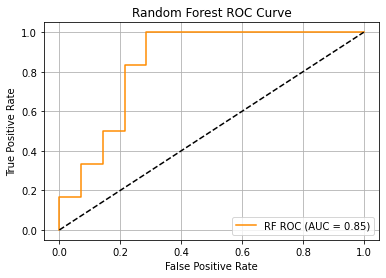

In [33]:
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange',
         label=f'RF ROC (AUC = {auc_rf:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


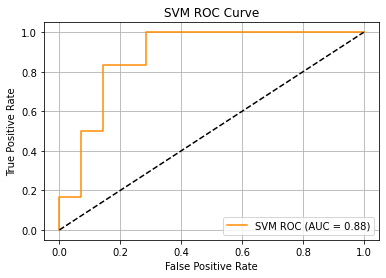

In [34]:
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange',
         label=f'SVM ROC (AUC = {auc_svm:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


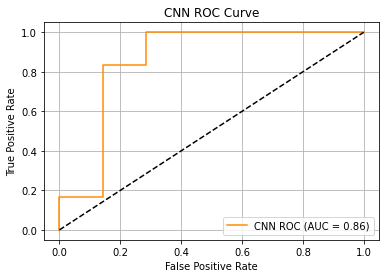

In [35]:
plt.figure()
plt.plot(fpr_cnn, tpr_cnn, color='darkorange',
         label=f'CNN ROC (AUC = {auc_cnn:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CNN ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [36]:
# ---- AVERAGES ACROSS FOLDS ----
rf_avg  = rf_df.mean(axis=1)
svm_avg = svm_df.mean(axis=1)
cnn_avg = cnn_df.mean(axis=1)

# combine to table
avg_table = pd.DataFrame({
    "RF_avg": rf_avg,
    "SVM_avg": svm_avg,
    "CNN_avg": cnn_avg
})

print("\n***** AVG METRICS ACROSS 10 FOLDS *****")
print(avg_table.round(decimals=2))



***** AVG METRICS ACROSS 10 FOLDS *****
             RF_avg  SVM_avg  CNN_avg
TP             2.30     3.70     3.90
TN            14.80    13.10    13.40
FP             1.20     2.90     2.60
FN             2.50     1.10     0.90
TPR            0.54     0.78     0.84
TNR            0.93     0.83     0.84
FPR            0.07     0.17     0.16
FNR            0.46     0.22     0.16
Precision      0.71     0.59     0.62
Accuracy       0.82     0.81     0.83
Recall         0.54     0.78     0.84
F1_measure     0.54     0.62     0.67
Error_rate     0.18     0.19     0.17
BAcc           0.73     0.80     0.84
TSS            0.47     0.60     0.68
HSS            0.44     0.51     0.57
AUC            0.91     0.90     0.93
Brier_score    0.12     0.12     0.12
BSS            0.30     0.32     0.25


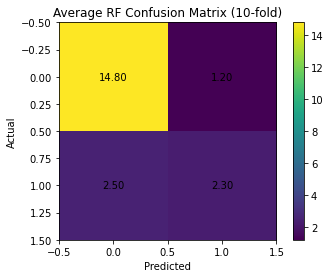

In [37]:
plt.figure()
plt.imshow(avg_rf_cm)
plt.title("Average RF Confusion Matrix (10-fold)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()

# write numbers inside squares
for i in range(avg_rf_cm.shape[0]):
    for j in range(avg_rf_cm.shape[1]):
        plt.text(j, i, f"{avg_rf_cm[i, j]:.2f}",
                 ha='center', va='center')

plt.show()

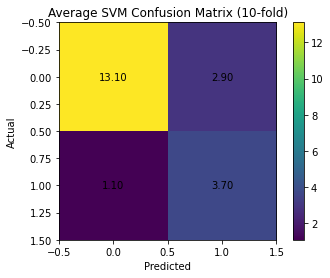

In [38]:
plt.figure()
plt.imshow(avg_svm_cm)
plt.title("Average SVM Confusion Matrix (10-fold)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()

for i in range(avg_svm_cm.shape[0]):
    for j in range(avg_svm_cm.shape[1]):
        plt.text(j, i, f"{avg_svm_cm[i, j]:.2f}",
                 ha='center', va='center')

plt.show()


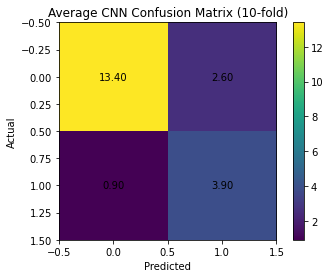

In [39]:
plt.figure()
plt.imshow(avg_cnn_cm)
plt.title("Average CNN Confusion Matrix (10-fold)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()

for i in range(avg_cnn_cm.shape[0]):
    for j in range(avg_cnn_cm.shape[1]):
        plt.text(j, i, f"{avg_cnn_cm[i, j]:.2f}",
                 ha='center', va='center')

plt.show()
